In [8]:
import numpy as np
import pandas as pd
import patsy as pt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.multioutput import MultiOutputRegressor
from pymoo.util.normalization import normalize
from pymoo.util.normalization import denormalize

import xgboost as xgb
import pickle
from catboost import CatBoostRegressor

from pymoo.factory import get_problem
from pymoo.util.plotting import plot

import autograd.numpy as anp


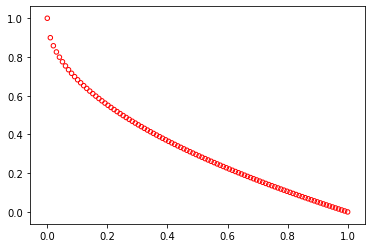

In [2]:
problem = get_problem("zdt1")
plot(problem.pareto_front(), no_fill=True)

In [45]:

F = problem.evaluate(anp.random.rand(100, 30),
                                              return_values_of=["F"])
M = problem.evaluate(anp.random.rand(100, 30),
                                              return_values_of=["F"])

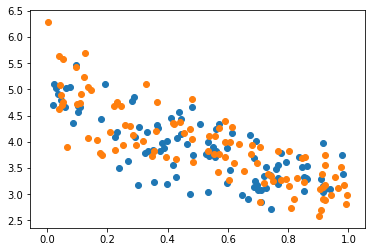

In [46]:
plot(F,M)



# 1. Input Data


In [3]:
## 25th Generation

X_25=np.load('D:\\New folder\\ML\\data\\input_data_25.npy')
y_25=np.load('D:\\New folder\\ML\\data\\output_data_25.npy')
child_25=np.load('D:\\New folder\\ML\\data\\before_25.npy',allow_pickle=True)
before_25=child_25[0].X
for i in range(1,100):
    before_25 = np.append(before_25,child_25[i].X,axis=0)
before_25=before_25.reshape(100,30)
len(before_25)


## 20th Generation

X_30=np.load('D:\\New folder\\ML\\data\\input_data_20.npy')
y_30=np.load('D:\\New folder\\ML\\data\\output_data_20.npy')
child_30=np.load('D:\\New folder\\ML\\data\\before_20.npy',allow_pickle=True)
before_30=child_30[0].X
for i in range(1,100):
    before_30 = np.append(before_30,child_30[i].X,axis=0)
before_30=before_30.reshape(100,30)
len(before_30)

# 35th Generation

X_35=np.load('D:\\New folder\\ML\\to_arpit\\input\\input_data_35.npy')
y_35=np.load('D:\\New folder\\ML\\to_arpit\\output\\output_data_35.npy')
child_35=np.load('D:\\New folder\\ML\\to_arpit\\child\\before_35.npy',allow_pickle=True)
before_35=child_35[0].X
for i in range(1,100):
    before_35 = np.append(before_35,child_35[i].X,axis=0)
before_35=before_35.reshape(100,30)
len(before_35)



100

# 2. Regression Models

2.1 25th Gen

In [4]:
X_25train, X_25test, y_25train, y_25test = train_test_split(X_25, y_25, train_size=0.8)

In [5]:
### RANDOM FOREST ###

max_features = 30 
tree_count   = 200

regr   = RandomForestRegressor(max_features=max_features, random_state=0, n_estimators=tree_count)
regr.fit(X_25train, y_25train)

y_25pred=regr.predict(X_25test)
print("MSE = ", mean_squared_error(y_25test, y_25pred))


MSE =  0.00256678406790094


In [8]:
### RANDOM FOREST ###

max_features = 30 
tree_count   = 200

regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=200,
                                                          max_features=max_features,
                                                          ))
regr_multirf.fit(X_25train, y_25train)

y_25pred=regr_multirf.predict(X_25test)
print("MSE = ", mean_squared_error(y_25test, y_25pred))


MSE =  0.0026427923668466695


In [29]:
xg_reg = MultiOutputRegressor(xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 30,  n_estimators = 100))

xg_reg.fit(X_25train,y_25train)

y_25pred = xg_reg.predict(X_25test)
print("MSE = ", mean_squared_error(y_25test, y_25pred))

D:\arpit\Anaconda_3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[15:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [89]:
xg_reg = MultiOutputRegressor(xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10,  n_estimators = 100))

xg_reg.fit(X_25train,y_25train)

y_25pred = xg_reg.predict(X_25test)
print("MSE = ", mean_squared_error(y_25test, y_25pred))

D:\arpit\Anaconda_3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[12:17:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [39]:
np.random.shuffle(before_25)
c1=before_25[50:]
c2=before_25[:50]
c2

array([[5.81871522e-01, 8.93808248e-01, 7.25037086e-01, ...,
        2.63295986e-01, 1.85986283e-01, 3.21764869e-01],
       [1.63438204e-04, 1.96707445e-01, 1.32903211e-01, ...,
        1.68190827e-01, 3.04162523e-01, 1.50394287e-01],
       [4.95421989e-01, 8.38041399e-01, 8.18624116e-01, ...,
        3.20919940e-01, 2.34757766e-01, 3.48975246e-02],
       ...,
       [9.56694468e-01, 9.40973745e-01, 7.73056579e-01, ...,
        3.23327783e-01, 2.17066383e-01, 4.29941156e-02],
       [8.88916325e-02, 2.15522655e-01, 2.66122058e-01, ...,
        1.80031553e-01, 5.69070282e-02, 1.56783629e-01],
       [3.08783121e-01, 2.19449163e-01, 1.96513135e-01, ...,
        2.66974495e-01, 1.95523789e-01, 1.27544381e-01]])

In [94]:
c3=xg_reg.predict(c2)
after_25=np.append(c1,c3,0)
c5=xg_reg.predict(before_25)

In [95]:
F = problem.evaluate(before_25,return_values_of=["F"])
G = problem.evaluate(c5,return_values_of=["F"])

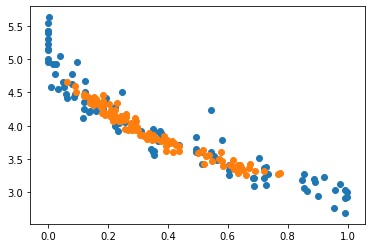

In [96]:
plot(F,G)

In [51]:
c4=regr.predict(c2)
after_25_1=np.append(c1,c4,0)
H = problem.evaluate(after_25_1,return_values_of=["F"])


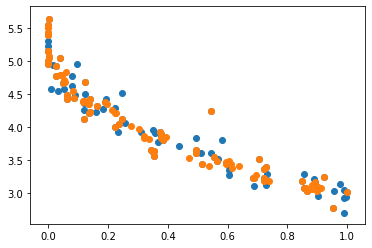

In [55]:
plot(F,H)

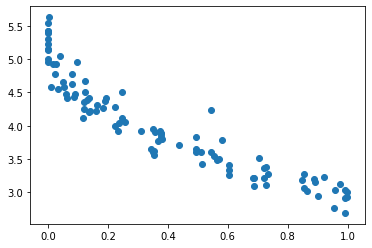

In [56]:
plot(F)

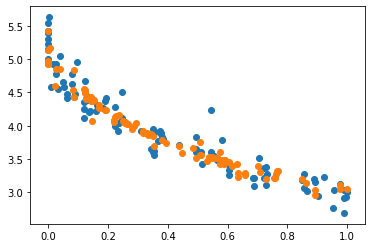

In [76]:
c5=model.predict(c2)
after_25_2=np.append(c1,c5,0)
I = problem.evaluate(after_25_2,return_values_of=["F"])
plot(F,I)


In [64]:
xg_reg = MultiOutputRegressor(xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 30,  n_estimators = 500))

xg_reg.fit(X_25,y_25)


D:\arpit\Anaconda_3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[16:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=30, min_child_weight=1,
                                            missing=None, n_estimators=500,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            ver

In [65]:
before_25n=normalize(before_25,x_min=min_25,x_max=max_25)
after_25n=xg_reg.predict(before_25n)
after_25=denormalize(after_25n,x_min=min_25,x_max=max_25)


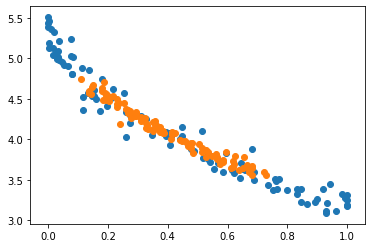

In [66]:
# With NORM

F = problem.evaluate(before_25,return_values_of=["F"])
G = problem.evaluate(after_25,return_values_of=["F"])
plot(F,G)

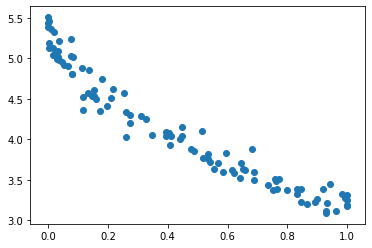

In [63]:
plot(F)

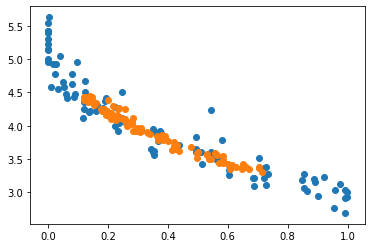

In [56]:
# With NORM using old data

F = problem.evaluate(before_25,return_values_of=["F"])
G = problem.evaluate(after_25,return_values_of=["F"])
plot(F,G)

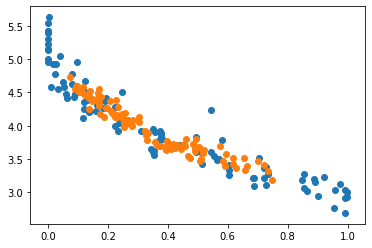

In [47]:
# Without NORM

after_25=xg_reg.predict(before_25)
F = problem.evaluate(before_25,return_values_of=["F"])
G = problem.evaluate(after_25,return_values_of=["F"])
plot(F,G)

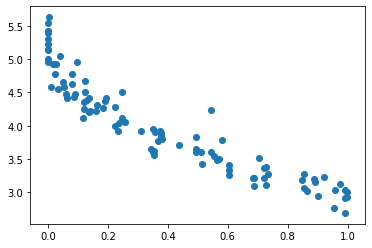

In [18]:
plot(F)

2.2 30th Gen

In [72]:
xg_reg = MultiOutputRegressor(xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 30,  n_estimators = 500))

xg_reg.fit(X_30,y_30)

D:\arpit\Anaconda_3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[16:48:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=30,
                                            min_child_weight=1, missing=None,
                                            n_estimators=500, n_jobs=1,
                                            nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
  

In [73]:
before_25n=normalize(before_30,x_min=min_25,x_max=max_25)
after_25n=xg_reg.predict(before_25n)
after_25=denormalize(after_25n,x_min=min_25,x_max=max_25)


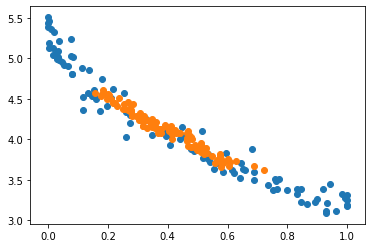

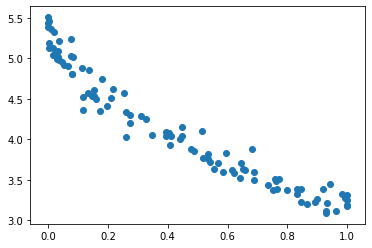

In [74]:
# With NORM

F = problem.evaluate(before_25,return_values_of=["F"])
G = problem.evaluate(after_25,return_values_of=["F"])
plot(F,G)
plot(F)

In [58]:
X_30train, X_30test, y_30train, y_30test = train_test_split(X_30, y_30, train_size=0.8)

In [59]:
### RANDOM FOREST ###

max_features = 30 
tree_count   = 200

regr_30   = RandomForestRegressor(max_features=max_features, random_state=0, n_estimators=tree_count)
regr_30.fit(X_30train, y_30train)

y_30pred=regr_30.predict(X_30test)
print("MSE = ", mean_squared_error(y_30test, y_30pred))

MSE =  0.0006588542701806772


In [61]:
xg_reg_30 = MultiOutputRegressor(xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 30,  n_estimators = 100))

xg_reg_30.fit(X_30train,y_30train)

y_30pred = xg_reg.predict(X_30test)
print("MSE = ", mean_squared_error(y_30test, y_30pred))

D:\arpit\Anaconda_3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[00:47:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [63]:
np.random.shuffle(before_30)
c1=before_30[50:]
c2=before_30[:50]

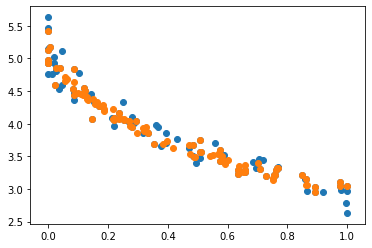

In [65]:
c3=xg_reg_30.predict(c2)
after_30=np.append(c1,c3,0)
F = problem.evaluate(before_30,return_values_of=["F"])
G = problem.evaluate(after_30,return_values_of=["F"])
plot(F,G)


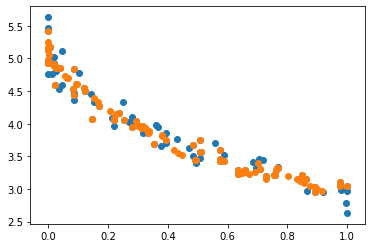

In [66]:
c3=regr_30.predict(c2)
after_30=np.append(c1,c3,0)
F = problem.evaluate(before_30,return_values_of=["F"])
G = problem.evaluate(after_30,return_values_of=["F"])
plot(F,G)

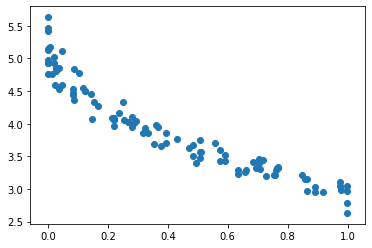

In [67]:
plot(F)

2.3 35th Gen

In [80]:
X_35train, X_35test, y_35train, y_35test = train_test_split(X_35, y_35, train_size=0.8)

In [81]:
### RANDOM FOREST ###

max_features = 30 
tree_count   = 200

regr_35   = RandomForestRegressor(max_features=max_features, random_state=0, n_estimators=tree_count)
regr_35.fit(X_35train, y_35train)

y_35pred=regr_35.predict(X_35test)
print("MSE = ", mean_squared_error(y_35test, y_35pred))

MSE =  0.000686867442520734


In [82]:
xg_reg_35 = MultiOutputRegressor(xgb.XGBRegressor( colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 30,  n_estimators = 100))

xg_reg_35.fit(X_35train,y_35train)

y_35pred = xg_reg.predict(X_35test)
print("MSE = ", mean_squared_error(y_35test, y_35pred))

D:\arpit\Anaconda_3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[11:31:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:31:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [85]:
np.random.shuffle(before_35)
c1=before_35[50:]
c2=before_35[:50]

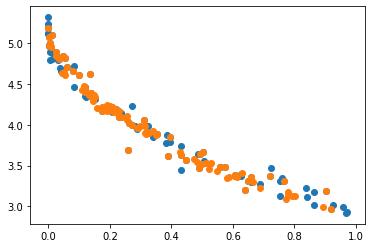

In [86]:
c3=xg_reg_35.predict(c2)
after_35=np.append(c1,c3,0)
F = problem.evaluate(before_35,return_values_of=["F"])
G = problem.evaluate(after_35,return_values_of=["F"])
plot(F,G)

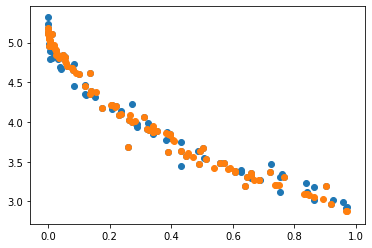

In [87]:
c3=regr_35.predict(c2)
after_35=np.append(c1,c3,0)
F = problem.evaluate(before_35,return_values_of=["F"])
G = problem.evaluate(after_35,return_values_of=["F"])
plot(F,G)

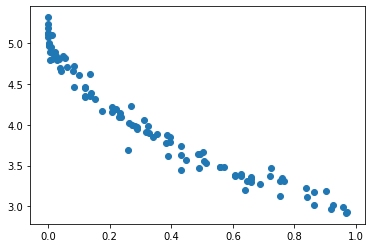

In [88]:
plot(F)